# Data Download

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("hanchen/posting-data")
Data_posting = pd.read_csv(path + '/postings_cleaned.csv')

100%|██████████| 43.6M/43.6M [00:00<00:00, 50.0MB/s]

Extracting files...



<ipython-input-1-c16a2578692d>:8: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_posting = pd.read_csv(path + '/postings_cleaned.csv')


In [2]:
Data_posting.head(5)[["company_name","title","pay_period","location","views","applies","formatted_experience_level","work_type","normalized_salary","country","industry"]]

,company_name,title,pay_period,location,views,applies,formatted_experience_level,work_type,normalized_salary,country,industry
0,Corcoran Sawyer Smith,Marketing Coordinator,HOURLY,"Princeton, NJ",20.0,2.0,NaN,FULL_TIME,38480.0,US,Real Estate
1,The National Exemplar,Assitant Restaurant Manager,YEARLY,"Cincinnati, OH",8.0,NaN,NaN,FULL_TIME,55000.0,US,Restaurants
2,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,YEARLY,"New Hyde Park, NY",16.0,NaN,NaN,FULL_TIME,157500.0,US,Law Practice
3,Downtown Raleigh Alliance,Economic Development and Planning Intern,HOURLY,"Raleigh, NC",9.0,4.0,NaN,INTERNSHIP,35360.0,US,Non-profit Organizations
4,Revesco Properties,Marketing & Office Coordinator,YEARLY,"Denver, CO",13.0,1.0,NaN,FULL_TIME,65000.0,US,Real Estate


In [3]:
Data_posting.shape

(32808, 25)

# Data Exploration

Histogram of Normalized Salary

<Axes: xlabel='normalized_salary', ylabel='Count'>

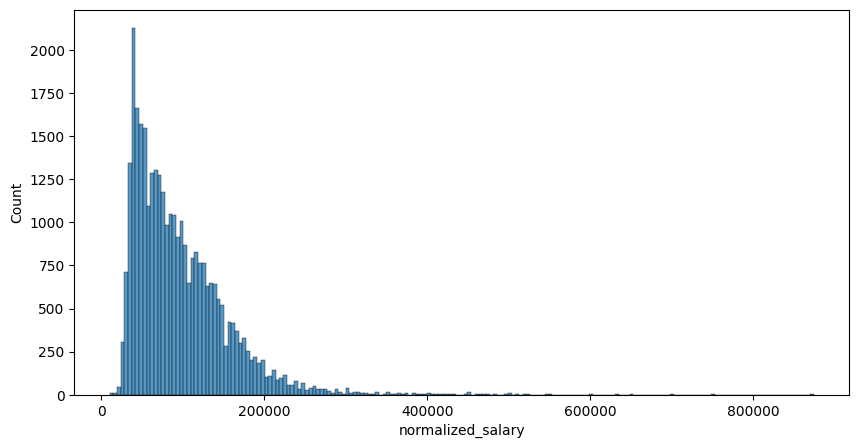

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(data=Data_posting, x="normalized_salary")

The scatter plot of applications versus views.

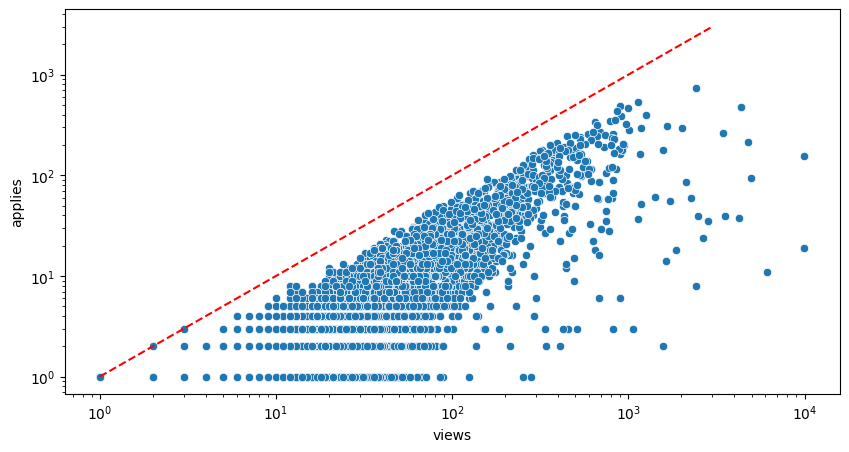

In [5]:
import seaborn as sns
plt.figure(figsize=(10,5))
g = sns.scatterplot(data = Data_posting, x = "views", y = "applies")


# Identity line (y = x)
plt.plot([1,3000], [1,3000], color='red', linestyle='--', label="y = x Line")

g.set_xscale("log")
g.set_yscale("log")

- Bar plot of count versus work type.
- Box plot of normalized salary versus work type.

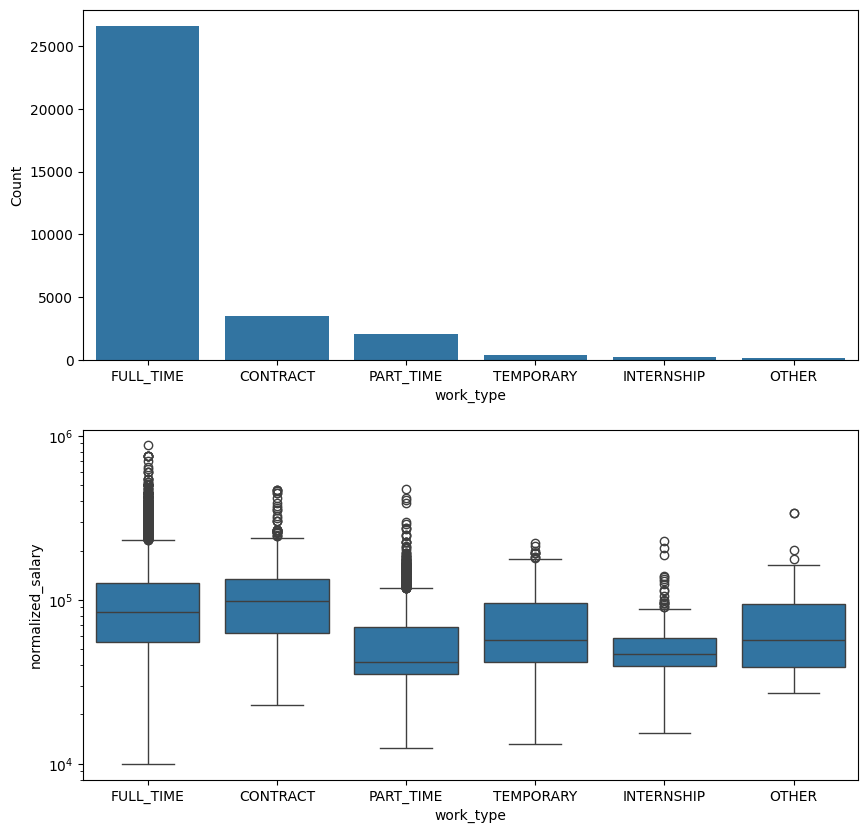

In [6]:
tmp_company_sort = Data_posting.groupby('work_type')['work_type'].count().rename("Count").sort_values(ascending=False).reset_index()
tmp_order_work_type = tmp_company_sort["work_type"]
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
g = sns.barplot(tmp_company_sort, x="work_type", y="Count", ax=axes[0])

g = sns.boxplot(data = Data_posting, x = 'work_type', y = 'normalized_salary', order=tmp_order_work_type, ax=axes[1])
g.set_yscale("log")

- Bar plot of count versus pay period.
- Box plot of normalized salary versus pay period.

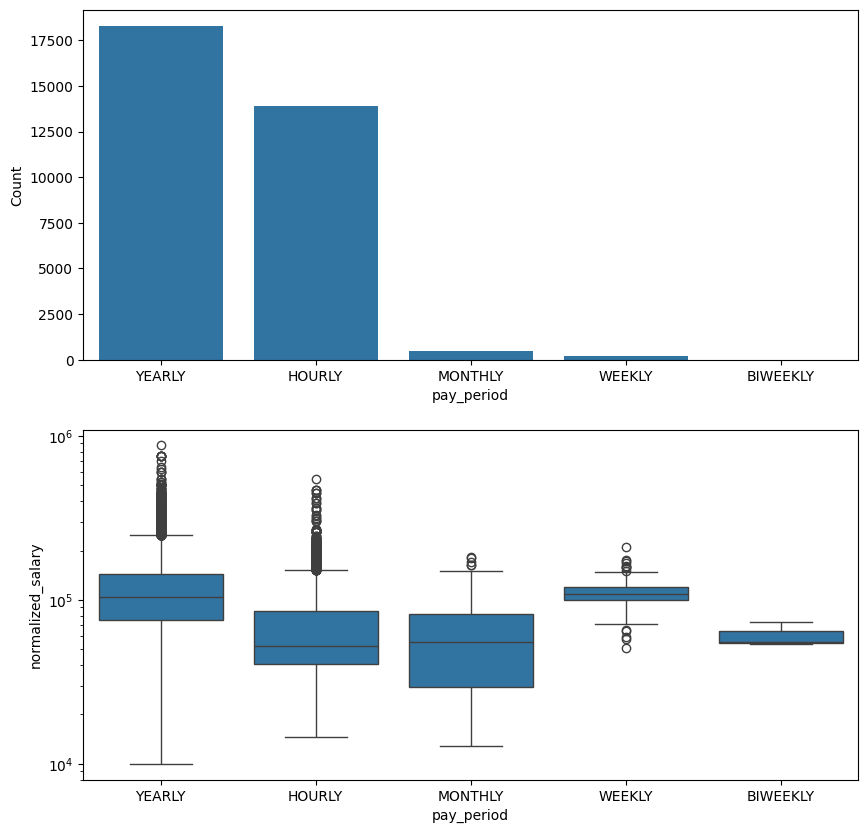

<Figure size 1000x500 with 0 Axes>

In [7]:
import seaborn as sns
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
tmp_company_sort = Data_posting.groupby('pay_period')['pay_period'].count().rename("Count").sort_values(ascending=False).reset_index()
tmp_order_pay_period = tmp_company_sort["pay_period"]
plt.figure(figsize=(10,5))
g = sns.barplot(tmp_company_sort, x="pay_period", y="Count", ax=axes[0])


g = sns.boxplot(data = Data_posting, x = 'pay_period', y = 'normalized_salary', order =tmp_order_pay_period, ax=axes[1])
g.set_yscale("log")

- Bar plot of count versus formatted experience level.
- Box plot of normalized salary versus formatted experience level.

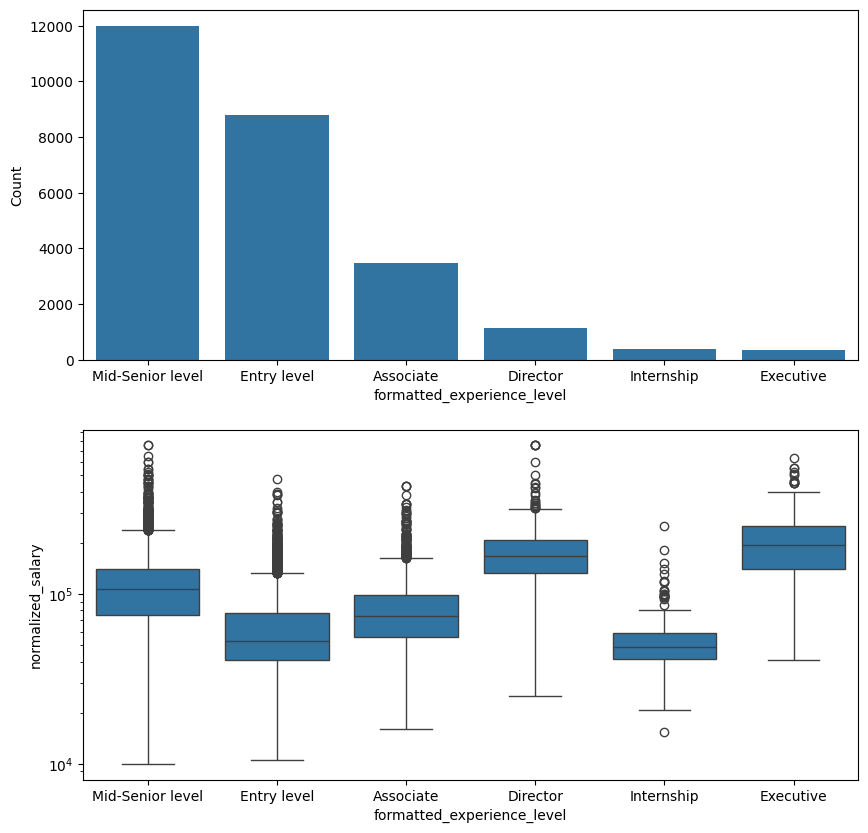

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
tmp_company_sort = Data_posting.groupby('formatted_experience_level')['formatted_experience_level'].count().rename("Count").sort_values(ascending=False).reset_index()
tmp_order_experience_level = tmp_company_sort["formatted_experience_level"]

g = sns.barplot(tmp_company_sort, x="formatted_experience_level", y="Count", ax=axes[0])
g = sns.boxplot(data = Data_posting, x = 'formatted_experience_level', y = 'normalized_salary', order = tmp_order_experience_level, ax=axes[1])
g.set_yscale("log")

Box plot of normalized salary by company for the top 40 companies with the highest median salary.

<ipython-input-9-7fddbc4e59ec>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


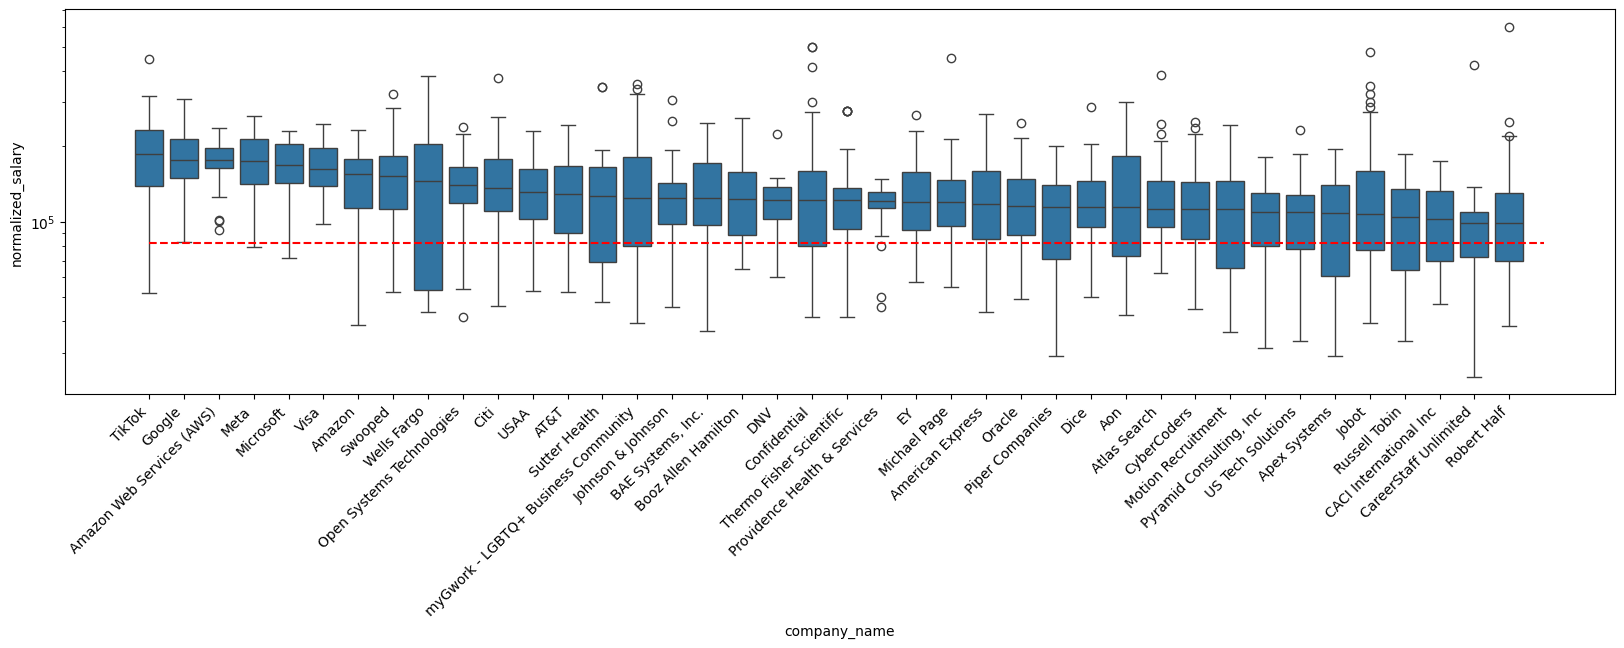

In [9]:
median_salary = Data_posting["normalized_salary"].median()
tmp_company_sort = Data_posting.groupby('company_name')['company_name'].count().sort_values(ascending=False)
tmp_company_name = tmp_company_sort.index[tmp_company_sort>=40]
Data_posting2 = Data_posting.copy()
Data_posting2.loc[~Data_posting2['company_name'].isin(tmp_company_name), 'company_name'] = 'Other'





#############
top_k=40
# Find the top K highest medians
medians = Data_posting2.groupby("company_name")["normalized_salary"].median().sort_values(ascending=False)
top_k_columns = medians.head(top_k).index

# Filter the dataframe to only include top K columns and sort by median
Data_posting3 = Data_posting2[Data_posting2["company_name"].isin(top_k_columns)]
#############

plt.figure(figsize=(20,5))
g = sns.boxplot(data = Data_posting3, x = 'company_name', y = 'normalized_salary', order=top_k_columns)
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.plot([0,40], [median_salary, median_salary], color='red', linestyle='--', label="y = x Line")

Box plot of normalized salary by company for the bottom 40 companies with the lowest median salary.

<ipython-input-10-8300817b2b29>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


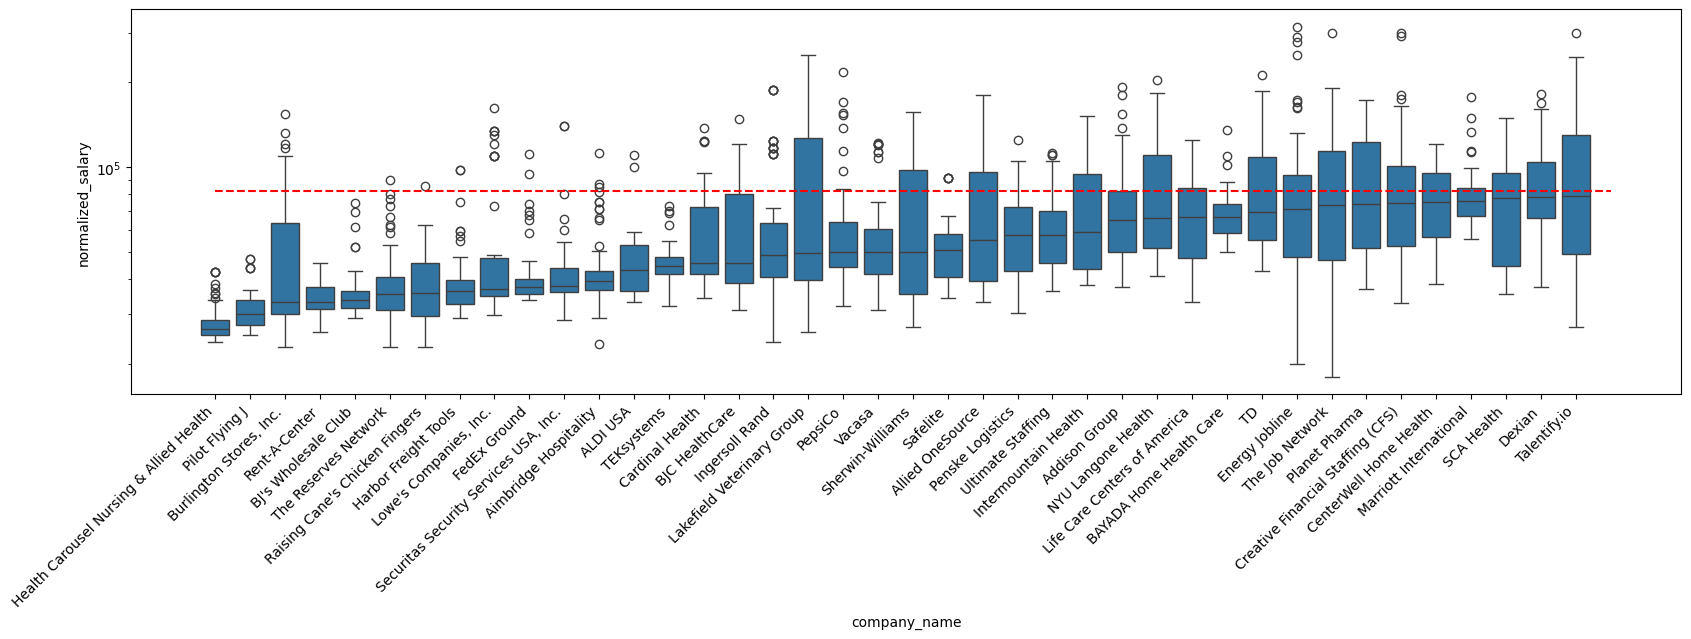

In [10]:
plt.figure(figsize=(20,5))
#############
top_k=40
# Find the top K highest medians
medians = Data_posting2.groupby("company_name")["normalized_salary"].median().sort_values(ascending=True)
top_k_columns = medians.head(top_k).index

# Filter the dataframe to only include top K columns and sort by median
Data_posting3 = Data_posting2[Data_posting2["company_name"].isin(top_k_columns)]
#############

g = sns.boxplot(data = Data_posting3, x = 'company_name', y = 'normalized_salary', order=top_k_columns)
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.plot([0,40], [median_salary, median_salary], color='red', linestyle='--', label="y = x Line")

Box plot of normalized salary by industry for the top 40 companies with the highest median salary.

<ipython-input-11-262adb9a43c5>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


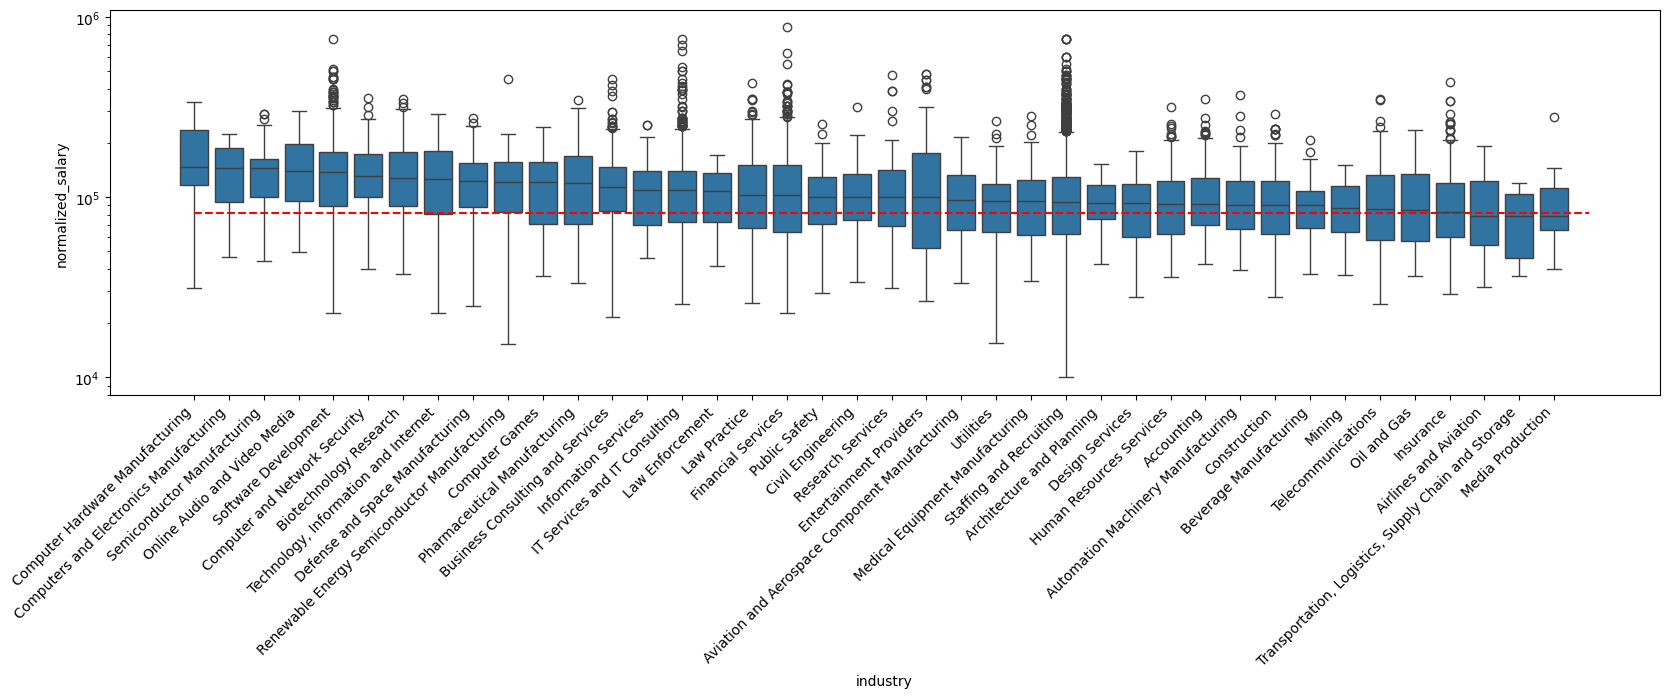

In [11]:
tmp_industry_sort = Data_posting.groupby('industry')['industry'].count().sort_values(ascending=False)
tmp_industry_name = tmp_industry_sort.index[tmp_industry_sort>=20]
Data_posting2 = Data_posting.copy()
Data_posting2.loc[~Data_posting2['industry'].isin(tmp_industry_name), 'industry'] = 'Other'




plt.figure(figsize=(20,5))

#############
top_k=40
# Find the top K highest medians
medians = Data_posting2.groupby("industry")["normalized_salary"].median().sort_values(ascending=False)
top_k_columns = medians.head(top_k).index

# Filter the dataframe to only include top K columns and sort by median
Data_posting3 = Data_posting2[Data_posting2["industry"].isin(top_k_columns)]
#############

g = sns.boxplot(data = Data_posting3, x = 'industry', y = 'normalized_salary', order=top_k_columns)
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.plot([0,40], [median_salary, median_salary], color='red', linestyle='--', label="y = x Line")

Box plot of normalized salary by industry for the bottom 40 companies with the lowest median salary.

<ipython-input-12-d90287d91635>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


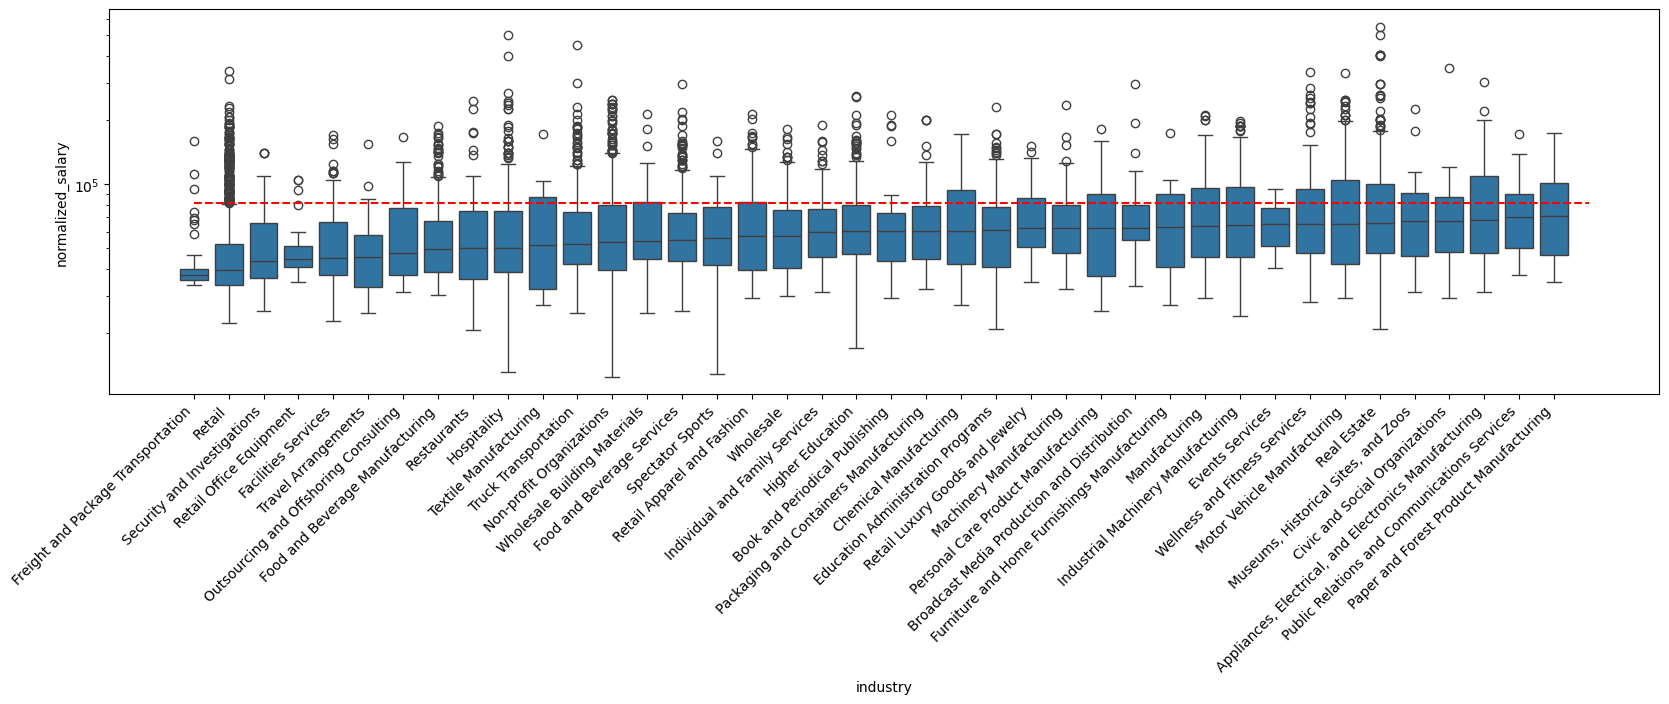

In [12]:
plt.figure(figsize=(20,5))

#############
top_k=40
# Find the top K highest medians
medians = Data_posting2.groupby("industry")["normalized_salary"].median().sort_values(ascending=True)
top_k_columns = medians.head(top_k).index

# Filter the dataframe to only include top K columns and sort by median
Data_posting3 = Data_posting2[Data_posting2["industry"].isin(top_k_columns)]
#############

g = sns.boxplot(data = Data_posting3, x = 'industry', y = 'normalized_salary', order=top_k_columns)
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.plot([0,40], [median_salary, median_salary], color='red', linestyle='--', label="y = x Line")

Box plot of normalized salary by country.

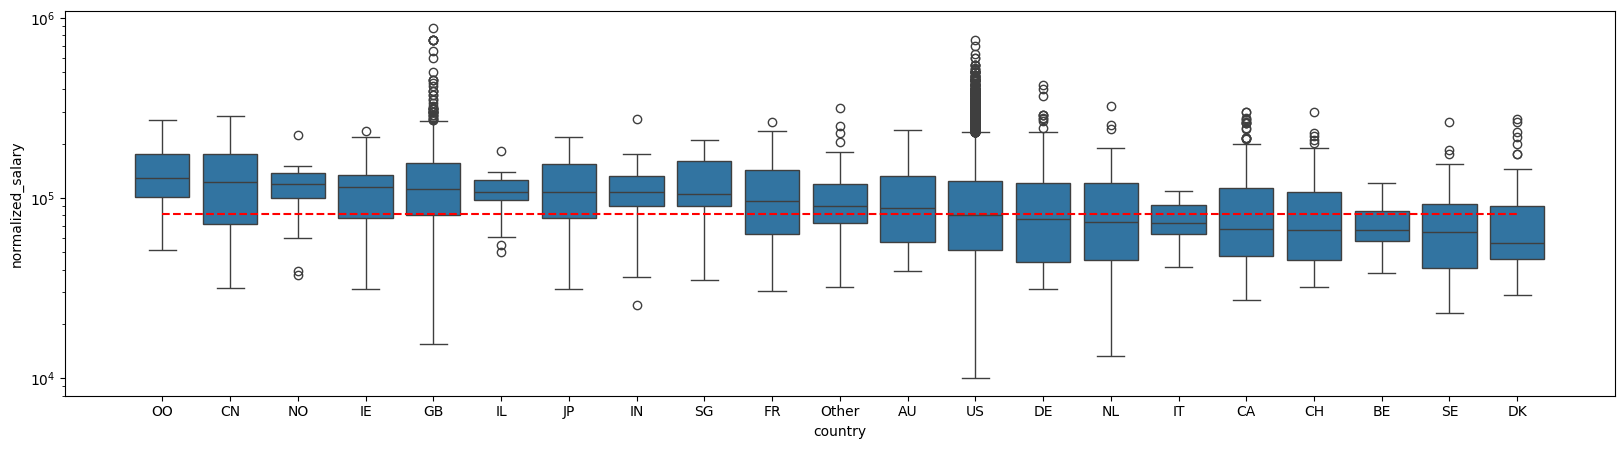

In [13]:
tmp_country_sort = Data_posting.groupby('country')['country'].count().sort_values(ascending=False)
tmp_country_name = tmp_country_sort.index[tmp_country_sort>=10]
Data_posting2 = Data_posting.copy()
Data_posting2.loc[~Data_posting2['country'].isin(tmp_country_name), 'country'] = 'Other'


import seaborn as sns
plt.figure(figsize=(20,5))

#############
top_k=100
# Find the top K highest medians
medians = Data_posting2.groupby("country")["normalized_salary"].median().sort_values(ascending=False)
top_k_columns = medians.head(top_k).index

# Filter the dataframe to only include top K columns and sort by median
Data_posting3 = Data_posting2[Data_posting2["country"].isin(top_k_columns)]
#############

g = sns.boxplot(data = Data_posting3, x = 'country', y = 'normalized_salary', order=top_k_columns)
g.set_yscale("log")
plt.plot([0,20], [median_salary, median_salary], color='red', linestyle='--', label="y = x Line")

# Text Mining

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
from IPython.display import display

tmp_str = Data_posting['title'].replace(r'[^a-zA-Z]', ' ', regex=True)
tmp_str_token = tmp_str.str.split()


##############################
import nltk
from nltk.stem import WordNetLemmatizer

# Download necessary datasets
nltk.download('punkt')
nltk.download('wordnet')

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()



# Lemmatize each word
tmp_str_lemm = pd.Series([[lemmatizer.lemmatize(word.lower(), pos='v') for word in tmp_sentence] for tmp_sentence in tmp_str_token])


tmp_str_lemm_comb = pd.Series([" ".join(tmp_sentence) for tmp_sentence in tmp_str_lemm])
##############################




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
tmp_table = pd.concat([tmp_str.head(5), tmp_str_token.head(5), tmp_str_lemm.head(5)], axis =1 )
tmp_table.columns = ["Original", "Tokenlize", "Lemmatize"]

tmp_table

,Original,Tokenlize,Lemmatize
0,Marketing Coordinator,"[Marketing, Coordinator]","[market, coordinator]"
1,Assitant Restaurant Manager,"[Assitant, Restaurant, Manager]","[assitant, restaurant, manager]"
2,Senior Elder Law Trusts and Estates Associat...,"[Senior, Elder, Law, Trusts, and, Estates, Ass...","[senior, elder, law, trust, and, estates, asso..."
3,Economic Development and Planning Intern,"[Economic, Development, and, Planning, Intern]","[economic, development, and, plan, intern]"
4,Marketing Office Coordinator,"[Marketing, Office, Coordinator]","[market, office, coordinator]"


## Word Cloud

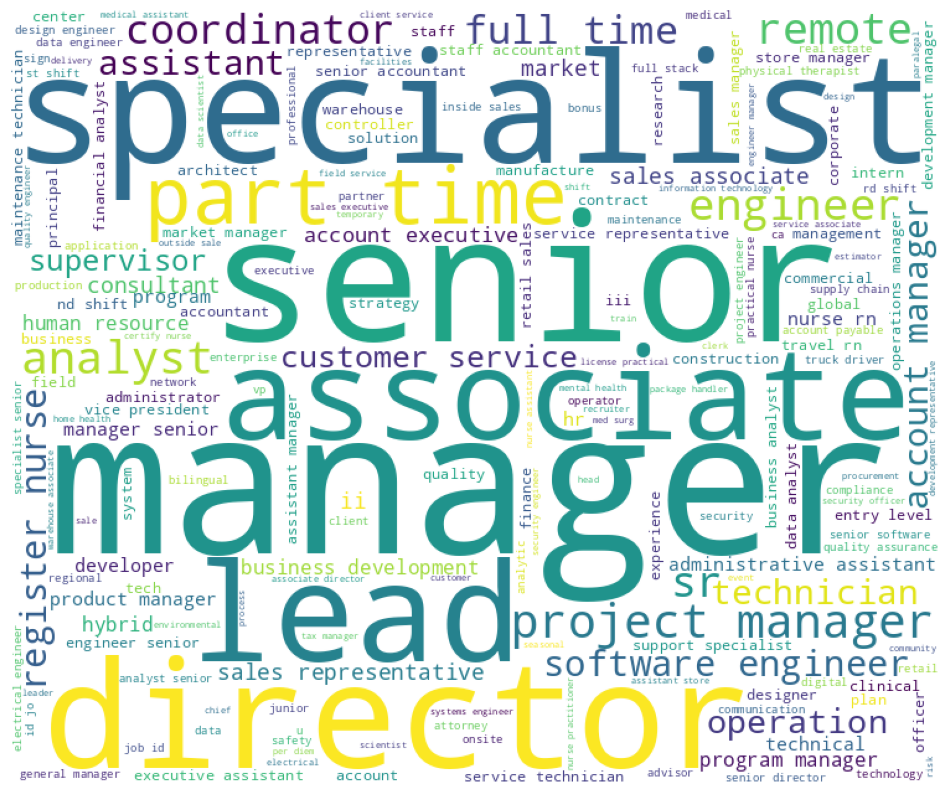

In [16]:
from wordcloud import WordCloud, STOPWORDS

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', width=750, height=625).generate(" ".join(tmp_str_lemm_comb))

# 繪圖
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## One Hot Encoding

In [17]:
import numpy as np

tmp_words = tmp_str_lemm.explode()
tmp_unique_word, count = np.unique(tmp_words, return_counts=True)
tmp_word_count = np.array([len(tmp_word) for tmp_word in tmp_unique_word])
vocabulary = list(set(tmp_unique_word[(count>20) & (tmp_word_count>2)]))  # Unique words in the string
vocabulary.remove("job")


# Initialize the MultiLabelBinarizer to handle one-hot encoding
mlb = MultiLabelBinarizer(classes=vocabulary)

# Convert the string to word one-hot encoding
one_hot_encoded = mlb.fit_transform(tmp_str_lemm)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['a', 'aa', 'aaa', 'ab', 'aba', 'abap', 'abercrombie', 'ability', 'abiomed', 'above', 'abs', 'absecon', 'absence', 'abstractor', 'abu', 'abuse', 'ac', 'academic', 'acc', 'accelerate', 'accelerator', 'accenture', 'accept', 'acceptable', 'acceptance', 'accesioning', 'accessibility', 'accessioner', 'accessor', 'accessories', 'accident', 'accommodations', 'accountability', 'accountants', 'accreditation', 'accruals', 'acct', 'accuform', 'acdc', 'ace', 'acf', 'aci', 'acm', 'acme', 'aco', 'acoustics', 'acq', 'acquisitions', 'acquistion', 'act', 'action', 'activation', 'active', 'activewear', 'activities', 'activity', 'actuarial', 'actuary', 'actuators', 'acuity', 'acumatica', 'ad', 'ada', 'adabas', 'adam', 'adaptation', 'adaptive', 'adas', 'adc', 'add', 'addiction', 'addictions', 'addison', 'adhesive', 'adjunct', 'adjustment', 'adl', 'administrators', 'adminstrative', 'adminstrator', 'a

In [18]:
tmp_data = pd.DataFrame(one_hot_encoded[0:5])
tmp_data.columns = mlb.classes_
pd.concat([tmp_str_lemm.head(5), tmp_data.iloc[:,np.where(tmp_data.iloc[4,:]==1)[0]].reset_index(drop=True)], axis = 1)

,0,market,office,coordinator
0,"[market, coordinator]",1,0,1
1,"[assitant, restaurant, manager]",0,0,0
2,"[senior, elder, law, trust, and, estates, asso...",0,0,0
3,"[economic, development, and, plan, intern]",0,0,0
4,"[market, office, coordinator]",1,1,1


In [19]:

X = one_hot_encoded
y = np.log(Data_posting.loc[:,'normalized_salary'])


from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import statsmodels.api as sm
X_train_new = sm.add_constant(X_train)
X_test_new = sm.add_constant(X_test)


# Fit and summarize OLS model
mod = sm.OLS(y_train, X_train_new)

res = mod.fit()

<ipython-input-20-c9db4d0934f9>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


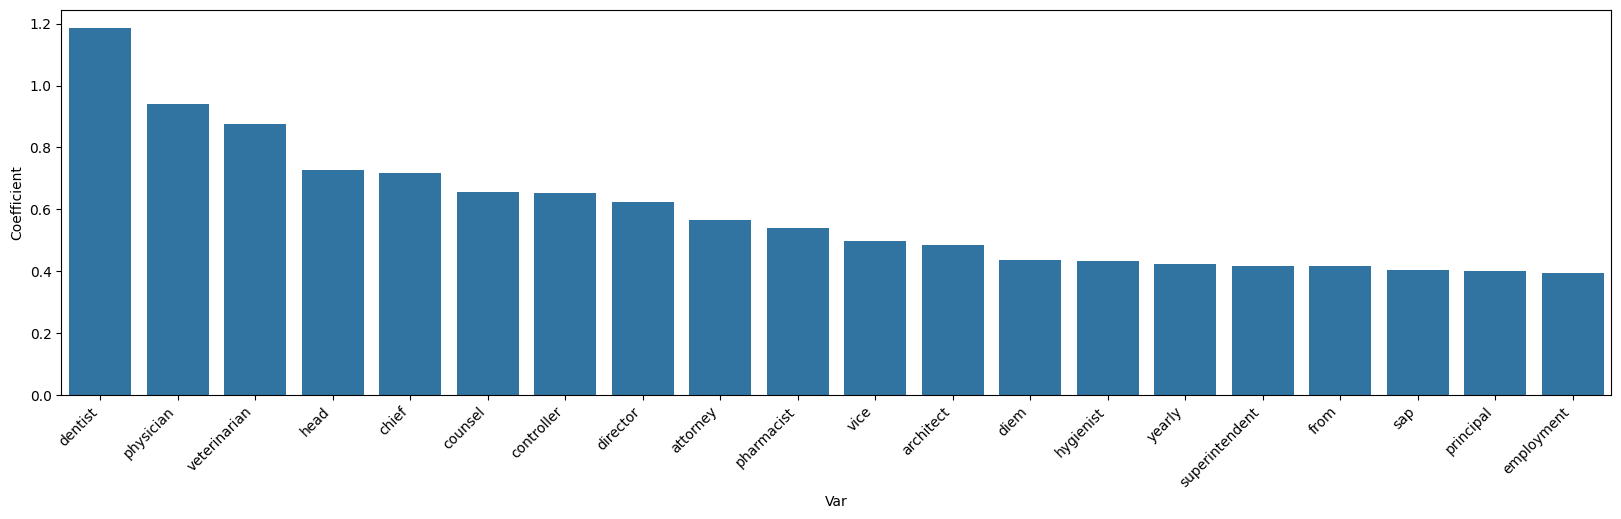

In [20]:
tmp_coef_data = pd.DataFrame({"Var": np.array(mlb.classes)[res.pvalues[1:]<=0.01], "Coefficient": res.params[1:][res.pvalues[1:]<=0.01]}).sort_values('Coefficient', ascending = False)#.tail(20)

plt.figure(figsize=(20,5))
tmp_data = tmp_coef_data.sort_values('Coefficient', ascending = False).head(20)
g = sns.barplot(data = tmp_data, x = "Var", y = "Coefficient")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

<ipython-input-21-5dc9ba0b64ba>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


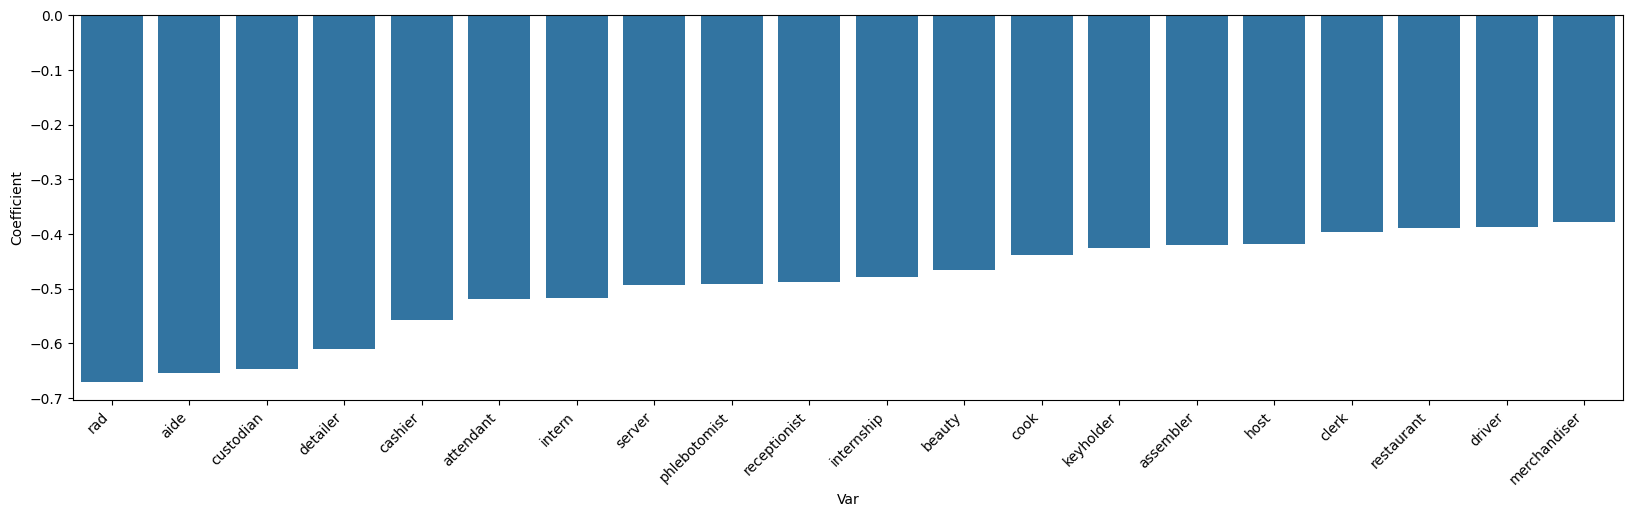

In [21]:
plt.figure(figsize=(20,5))
tmp_data = tmp_coef_data.sort_values('Coefficient').head(20)
g = sns.barplot(data = tmp_data, x = "Var", y = "Coefficient")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

In [22]:
Data_posting.loc[one_hot_encoded[:,np.array(mlb.classes)=="rad"]==1,:]

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,application_type,formatted_experience_level,skills_desc,work_type,normalized_salary,state,country,employee_count,follower_count,industry
2067,3885858668,Health Carousel Nursing & Allied Health,X-Ray Travel Rad Technologist - Job Id: JO0371...,Health Carousel Nursing and Allied Health is s...,NaN,MONTHLY,"Baltimore, MD",1506196,4.0,2052.0,...,OffsiteApply,Mid-Senior level,NaN,FULL_TIME,24624.0,OH,US,242,4014,Staffing and Recruiting
2100,3885861110,Health Carousel Nursing & Allied Health,RAD Travel Interventional Radiology Technologi...,Health Carousel Nursing and Allied Health is s...,NaN,MONTHLY,"Baltimore, MD",1506196,4.0,2392.0,...,OffsiteApply,Mid-Senior level,NaN,FULL_TIME,28704.0,OH,US,242,4014,Staffing and Recruiting
3946,3887909808,Health Carousel Nursing & Allied Health,RAD Travel Rad Technologist - Job Id: JO03716490,Health Carousel Nursing and Allied Health is s...,NaN,MONTHLY,"Casa Grande, AZ",1506196,5.0,2197.0,...,OffsiteApply,Mid-Senior level,NaN,FULL_TIME,26364.0,OH,US,242,4014,Staffing and Recruiting
3991,3887914003,Health Carousel Nursing & Allied Health,X-Ray Travel Rad Technologist - Job Id: JO0371...,Health Carousel Nursing and Allied Health is s...,NaN,MONTHLY,"Lafayette, IN",1506196,5.0,2008.0,...,OffsiteApply,Mid-Senior level,NaN,FULL_TIME,24096.0,OH,US,242,4014,Staffing and Recruiting
3993,3887914171,Health Carousel Nursing & Allied Health,X-Ray Travel Rad Technologist - Job Id: JO0371...,Health Carousel Nursing and Allied Health is s...,NaN,MONTHLY,"Richmond, VA",1506196,5.0,2061.0,...,OffsiteApply,Mid-Senior level,NaN,FULL_TIME,24732.0,OH,US,242,4014,Staffing and Recruiting
7881,3894616371,Health Carousel Nursing & Allied Health,RAD Travel Interventional Radiology Technologi...,Health Carousel Nursing and Allied Health is s...,NaN,MONTHLY,"Lexington, KY",1506196,4.0,2510.0,...,OffsiteApply,Mid-Senior level,NaN,FULL_TIME,30120.0,OH,US,242,4014,Staffing and Recruiting
13877,3901477933,Connected Health Care,Rad Tech (FT) - Hospital setting,Job Description\n\nConnected Health Care has a...,NaN,HOURLY,"Phoenix, AZ",72610772,5.0,39.0,...,OffsiteApply,Entry level,NaN,FULL_TIME,81120.0,TX,US,56,2368,Staffing and Recruiting
20285,3903469970,Health Carousel Nursing & Allied Health,RAD Travel Rad Technologist - Job Id: JO03721053,Health Carousel Nursing and Allied Health is s...,NaN,MONTHLY,"Washington, DC",1506196,4.0,2121.0,...,OffsiteApply,Mid-Senior level,NaN,FULL_TIME,25452.0,OH,US,242,4014,Staffing and Recruiting
20307,3903470998,Health Carousel Nursing & Allied Health,RAD Travel Interventional Radiology Technologi...,Health Carousel Nursing and Allied Health is s...,NaN,MONTHLY,"Portland, ME",1506196,5.0,3209.0,...,OffsiteApply,Mid-Senior level,NaN,FULL_TIME,38508.0,OH,US,242,4014,Staffing and Recruiting
20438,3903475229,Health Carousel Nursing & Allied Health,RAD Travel Rad Technologist - Job Id: JO03721073,Health Carousel Nursing and Allied Health is s...,NaN,MONTHLY,"Glendale, AZ",1506196,4.0,2207.0,...,OffsiteApply,Mid-Senior level,NaN,FULL_TIME,26484.0,OH,US,242,4014,Staffing and Recruiting


0.5780751356213158

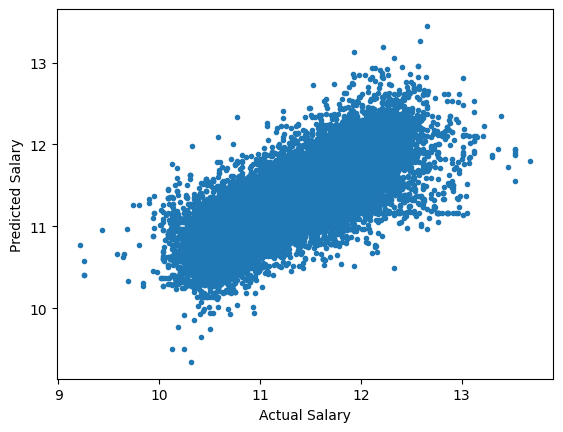

In [23]:
y_train_pred = res.predict(X_train_new)
plt.plot(y_train, y_train_pred, '.')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")


from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)


y_test_pred = res.predict(X_test_new)
r2_score(y_test,y_test_pred)

# Linear Regression

In [24]:
from sklearn.preprocessing import OneHotEncoder

Data_posting2 = Data_posting.copy()
Data_posting2.loc[~Data_posting2['company_name'].isin(tmp_company_name), 'company_name'] = 'Other'
Data_posting2.loc[~Data_posting2['industry'].isin(tmp_industry_name), 'industry'] = 'Other'
Data_posting2.loc[~Data_posting2['country'].isin(tmp_country_name), 'country'] = 'Other'

cat_features = ["company_name","pay_period","formatted_experience_level","work_type","country","industry"]


encoder = OneHotEncoder(handle_unknown="ignore", drop = "first")
one_hot_encoded_cat_var = encoder.fit_transform(Data_posting2.loc[:,cat_features])

encoded_feature_names = encoder.get_feature_names_out(cat_features)

In [25]:
all_one_hot_encoded_var = np.concatenate((one_hot_encoded, one_hot_encoded_cat_var.toarray()), axis=1)
all_columns_name = np.concat([mlb.classes, encoded_feature_names],axis=0)

In [26]:
X2 = all_one_hot_encoded_var
y = np.log(Data_posting.loc[:,'normalized_salary'])


# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)
#y = y - y.mean()

import statsmodels.api as sm
X_train2_new = sm.add_constant(X_train2)
X_test2_new = sm.add_constant(X_test2)
#X2_new = X2

# Fit and summarize OLS model
mod2 = sm.OLS(y_train, X_train2_new)

res2 = mod2.fit()

In [27]:
tmp_coef_data2 = pd.DataFrame({"Var": all_columns_name[res2.pvalues[1:]<=0.01], "Coefficient": res2.params[1:][res2.pvalues[1:]<=0.01]}).sort_values('Coefficient', ascending = False)#.tail(20)

In [28]:
tmp_coef_data2 = pd.DataFrame({"Var": all_columns_name[res2.pvalues[1:]<=0.01], "Coefficient": res2.params[1:][res2.pvalues[1:]<=0.01]})#.sort_values('Coefficient', ascending = False)#.tail(20)

In [29]:
tmp_coef_data3 = tmp_coef_data2.iloc[:-103]

In [30]:
tmp_coef_data3

,Var,Coefficient
x2,growth,0.158891
x5,junior,-0.204672
x13,merchandiser,-0.236460
x15,host,-0.474395
x21,cybersecurity,0.179619
...,...,...
x689,surgical,0.099367
x692,retail,-0.106703
x693,image,0.192628
x694,chief,0.440613


In [31]:
tmp_coef_data2.sort_values('Coefficient', ascending = False).head(20)

,Var,Coefficient
x464,dentist,0.988635
x93,veterinarian,0.854928
x60,physician,0.771747
x343,pharmacist,0.680023
x584,hygienist,0.519111
x390,diem,0.505363
x807,formatted_experience_level_Executive,0.472103
x234,head,0.471545
x538,counsel,0.463530
x694,chief,0.440613


In [32]:
tmp_coef_data2.sort_values('Coefficient', ascending = True).head(20)

,Var,Coefficient
x736,company_name_Health Carousel Nursing & Allied ...,-1.217816
x787,company_name_The Reserves Network,-0.824404
x721,company_name_CenterWell Home Health,-0.699956
x772,company_name_Rent-A-Center,-0.651898
x705,company_name_Allied OneSource,-0.625316
x715,company_name_BJC HealthCare,-0.575377
x730,company_name_EY,-0.569795
x414,aide,-0.543066
x783,company_name_TEKsystems,-0.511751
x778,"company_name_Securitas Security Services USA, ...",-0.511279


0.6756415716110338

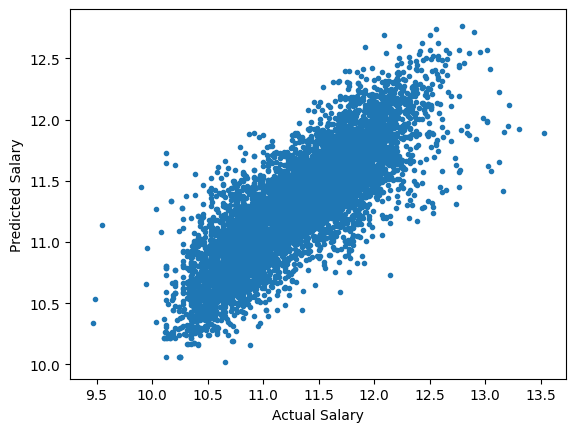

In [33]:
y_test_pred2 = res2.predict(X_test2_new)
plt.plot(y_test, y_test_pred2, '.')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")


from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred2)

<ipython-input-34-94bb3bc2ba3f>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


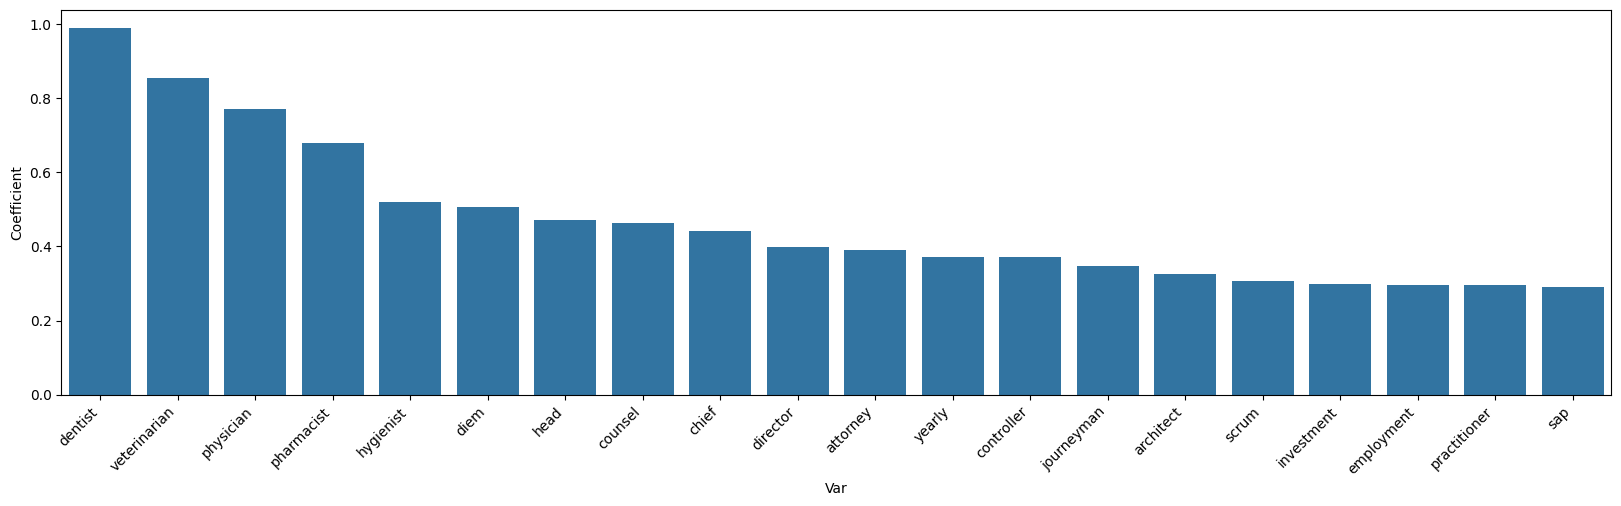

In [34]:
plt.figure(figsize=(20,5))
tmp_data = tmp_coef_data3.sort_values('Coefficient', ascending = False).head(20)
g = sns.barplot(data = tmp_data, x = "Var", y = "Coefficient")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


<ipython-input-35-a672e78f9048>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


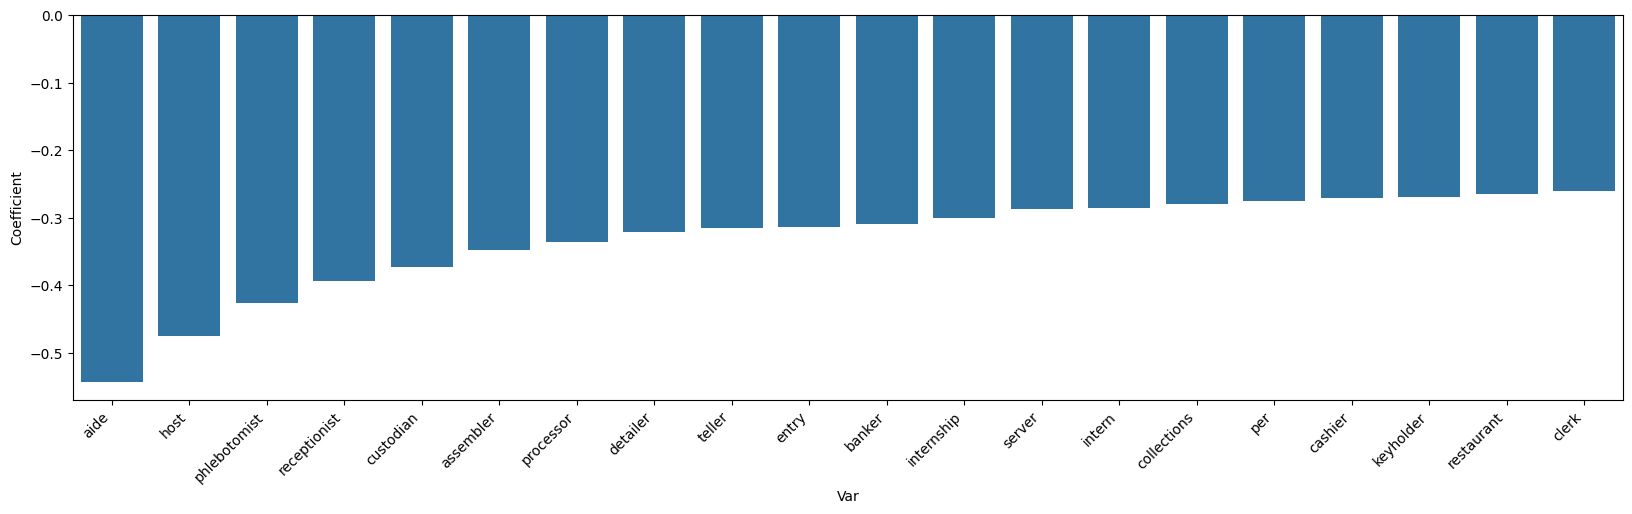

In [35]:
plt.figure(figsize=(20,5))
tmp_data = tmp_coef_data3.sort_values('Coefficient').head(20)
g = sns.barplot(data = tmp_data, x = "Var", y = "Coefficient")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


# Boosting

In [36]:
import xgboost as xgb
import shap
import numpy as np
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence


from sklearn.model_selection import train_test_split


In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500, 1000, 2000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 3, 5, 7, 9, 11]
}

grid_search_boost = GridSearchCV(
    estimator = xgb.XGBRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_boost.fit(X_train2, y_train)

grid_search_boost.best_params_

import pickle
with open('model.pckl', 'wb') as f:
    pickle.dump(grid_search_boost, f)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [54]:
import pickle
########################################
with open('model.pckl', 'rb') as f:
    grid_search_boost = pickle.load(f)
########################################

In [55]:
# --- Permutation Feature Importance ---
result = permutation_importance(grid_search_boost, X_test2, y_test, n_repeats=10, random_state=42)

import pickle

with open('store.pckl', 'wb') as f:
    pickle.dump(result, f)

In [48]:

########################################
with open('store.pckl', 'rb') as f:
    result = pickle.load(f)
########################################

importance = result.importances_mean
std = result.importances_std

In [49]:
tmp_ind_no_imp = ((importance - 2*std)>0)
tmp_top_ind = np.argsort(-1*importance)[0:50]

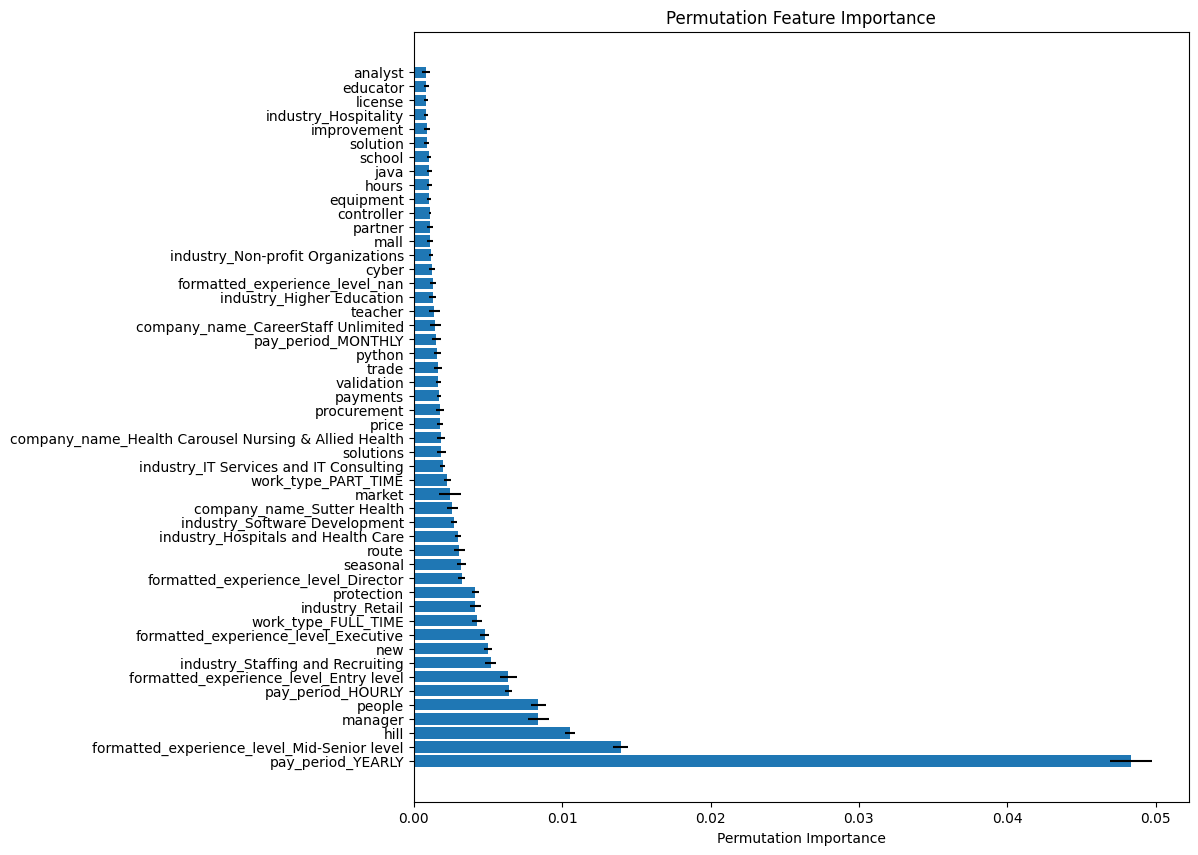

In [50]:
# Plot Permutation Feature Importance
plt.figure(figsize=(10,10))
plt.barh(np.arange(len(importance[tmp_top_ind])), importance[tmp_top_ind], xerr=std[tmp_top_ind])
plt.yticks(np.arange(len(importance[tmp_top_ind])), all_columns_name[tmp_top_ind])
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.show()

0.7333975125160599

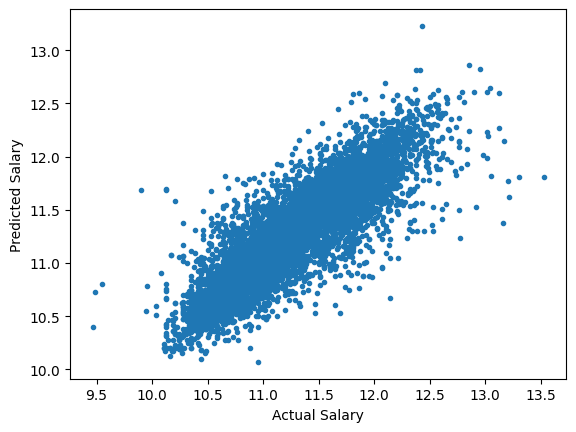

In [56]:
y_pred_xgboost = grid_search_boost.predict(X_test2)
plt.plot(y_test2,y_pred_xgboost,'.')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")


r2_score(y_test2,y_pred_xgboost)

In [57]:
grid_search_boost.best_params_

{'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 2000}